# Tittle: A report on the PythonSQLite database consistency.persistency.
### Name : Aman Timalsina
### Student Name ID: 24014306

 ### Introduction

The Shared Prosperity Index (SP) is a composite index of 4 multi-variate dimensions to visualize and quantify the progress of shared prosperity within New Zealand. These dimensions for study include unemployment rate, employment by Age group between 60-64 years, low pay percent_OECD, and employees working long hours, 65 years and over un emp rate, age, underemployment_rate. The aim is to become a catalyst for understanding how prosperity is better measured collectively, emphasizing a more comprehensive approach to overall welfare knowledge, and hopefully updating better future prosperity indices as inputs. For the original idea and authors of this index, this report aims to update specific indices of these dimensions and attempt to establish assumptions and connections on the selected variables for study which uncover insights on identified the pattern, trend, and present visual representations of these efforts for better understanding.

Datasets used and updated:

1.	Shared Prosperity Indices on Socio-economic Data of New Zealand

2.	Well-being Statistics from NZ General Social Survey of 1980 to 2022
	
3.	Unemployment rate Statistics
	
4.	Age group between 60-64 years Statistics
	
5.	low_pay_percent_OECD_def Statistics
	
6.	employees_working_long_hours Statistics

7.  65years_and_over_unemp_rate Statistics

8.  Aged 25-34 Years Statistics

9.  Underemployment_rate Statistics

10.  65 years_and_above Statistics

11. Ethnicity - Asian, Pacific Peoples, and Maori Statistics

12.  Gender- Male and Female Statistics

13.  living_min_wage_gap_magnitude Statistics

14.  long_term_unemployment_rate Statistics



 ### Dataset sources:



1.	Shared Prosperity Indices on Socio-economic Data of New Zealand
   
2.	Well-being Statistics NZ


### Research Questions:

The following research questions were initially drafted upon reviewing the data description and detailed information on the indicators found on the SP Index. These questions stem from the desire to establish how Unemployment and age groups between 60-64 years are closely connected.
From these deductions, the selected indices were pre-conceived, assuming that the selected index greatly affects the other. From this given information, the questions below served as hypotheses in leading the EDA and further data analysis.

1. How does the employment rate among the different age group of 60-64 age group, 65years_and_over_unemp_rate, and Aged 25-34 Years influence the Shared Prosperity Index (SP) in New Zealand from 1980 to 2022?
   
2. How age impact the unemployment over in New Zealand?

3. The co-relationship between underemployment and the long term unemployment rate impact on their economic condition?
   
4. Unemployment rate and the impact of labour market insecurity, and law pay OCED?

5. What is the unemployment rate among genders, and how does it correlate with the employment trends?
   
6. How all of these above overall impact the employment rate in New Zealand?



In [12]:
%store -r new_df
new_df

,unemployment_rate,living_min_wage_gap_magnitude
0,8.40000,2.131389
1,8.00000,2.131389
2,6.00000,2.131389
3,4.00000,2.131389
4,4.20000,2.131389
...,...,...
136,6.09375,2.131389
137,6.09375,2.131389
138,6.09375,2.131389
139,6.09375,2.131389


In [13]:
%store -r age_df
%store -r labour_df
%store -r gender_df
%store -r under_df
%store -r low_df
%store -r employ_df


In [14]:
age_df

,60_64_years_unemp_rate,65years_and_over_unemp_rate,Aged 25-34 Years
0,3.300,2.30,3.6
1,3.300,2.10,3.8
2,2.900,1.70,4.6
3,2.500,1.67,4.2
4,1.300,1.70,4.1
...,...,...,...
136,2.925,1.67,3.7
137,2.925,1.67,3.9
138,2.925,1.67,4.6
139,2.925,1.67,4.6


In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import datetime
from IPython.display import Image 
import re
import requests
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
pd.set_option('display.max_columns', 140)
pd.set_option('display.max_rows', 45)
rcParams['figure.figsize'] = 12, 6
rcParams['font.size'] = 10
from scipy.signal import savgol_filter
warnings.filterwarnings("ignore")

%matplotlib inline

In this Section, certain parts of the data will initially be analyzed and evaluated for clarity and structure. A sequence of activities were followed based on the visual inspection and manipulation of the presented data. These will include certain assumptions on how the data types will be erased, replaced, and filtered, including data that can only be used presumably for analysis based on completeness and comparison per year.

# Data Integration

In [15]:
unemp_df = new_df[['unemployment_rate', 'living_min_wage_gap_magnitude']]
age_df = age_df[['60_64_years_unemp_rate', '65years_and_over_unemp_rate', 'Aged 25-34 Years']]
underemp_df = under_df[['underemployment_rate', 'long_term_unemployment_rate']]
labour_df = labour_df[['low_pay_percent_OECD_def', 'labour_market_insecurity']]
gender_df = gender_df[['Male', 'Female']]
ethnicity_df= low_df[['Asian','Pacific Peoples','Maori']]



# Data Presistence 

In [8]:
import sqlite3

# Create a SQLite database
conn = sqlite3.connect('unemployment_database_aman.db')

# Function to create and populate tables
def create_and_populate_table(df, create_table_query, table_name):
    # Create table with columns based on DataFrame columns
    conn.execute(create_table_query)
    
    # Populate table with DataFrame data
    df.to_sql(table_name, conn, index=False, if_exists='replace')

# Create Age table
age_table_query = f"""CREATE TABLE Age (
    idAge INTEGER PRIMARY KEY,
    "60_64_years_unemp_rate" REAL,
    "65years_and_over_unemp_rate" REAL,
    "Aged 25-34 Years" REAL
);"""

# Create UnderEmployment table
underEmployment_table_query = f"""
CREATE TABLE UnderEmployment (
    idUnder INTEGER PRIMARY KEY,
    underemployment_rate REAL,
    long_term_unemployment_rate REAL
);
"""

# Create Labour table
labour_table_query = f"""
CREATE TABLE Labour (
    idlabour INTEGER PRIMARY KEY,
    low_pay_percent_OECD_def REAL,
    labour_market_insecurity REAL
);"""

# Create Ethinicity table
ethnicity_table_query = f"""CREATE TABLE Ethinicity (
    idEth INTEGER PRIMARY KEY,
    Asian REAL,
    Maori REAL,
    Pacific_Peoples REAL
);"""

# Create Gender table
gender_table_query = f"""CREATE TABLE Gender (
    IdGender INTEGER PRIMARY KEY,
    Male REAL,
    Female REAL
);"""

# Create Unemployment table with foreign keys
unemployment_table_query = f"""CREATE TABLE Unemployment (
    idUnemp INTEGER PRIMARY KEY,
    unemployment_rate REAL,
    living_min_wage_gap_magnitude REAL,
    idAge INTEGER,
    idUnder INTEGER,
    IdGender INTEGER,
    idLabour INTEGER,
    idEth INTEGER,
    FOREIGN KEY (idAge) REFERENCES Age(idAge),
    FOREIGN KEY (idUnder) REFERENCES UnderEmployment(idUnder),
    FOREIGN KEY (IdGender) REFERENCES Gender(IdGender),
    FOREIGN KEY (idLabour) REFERENCES Labour(idlabour),
    FOREIGN KEY (idEth) REFERENCES Ethinicity(idEth)
);"""


# Close the connection
conn.close()


In [77]:
conn = sqlite3.connect('unemployment_database_aman.db')
# Call the function to create and populate tables
#create_and_populate_table(age_df, age_table_query, 'Age')
#create_and_populate_table(underemp_df, underEmployment_table_query, 'UnderEmployment')
#create_and_populate_table(labour_df, labour_table_query, 'Labour')
#create_and_populate_table(ethnicity_df, ethnicity_table_query, 'Ethnicity')
#create_and_populate_table(gender_df, gender_table_query, 'Gender')
#create_and_populate_table(unemp_df, unemployment_table_query, 'Unemployment')
conn.close()

In [72]:
underemp_df.head()

,underemployment_rate,long_term_unemployment_rate
0,3.742857,32.935026
1,3.742857,22.063666
2,4.000000,8.914450
3,3.300000,11.650486
4,3.742857,10.567515


In [79]:
conn = sqlite3.connect('unemployment_database_aman.db')
#gender_df.to_sql('Gender', conn, index=False, if_exists='append')
#age_df.to_sql('Age', conn, index=False, if_exists='append')
#ethinicity_df.to_sql('ethinicity', conn, index=False, if_exists='append')
#labour_df.to_sql('Labour', conn, index=False, if_exists='append')
underemp_df.to_sql('UnderEmployment', conn, index=False, if_exists='append')
conn.close()





In [72]:
# Connect to SQLite database containing integrated datasets
import sqlite3
conn = sqlite3.connect('unemployment_database_aman.db')

# Example 1: Perform a simple SELECT query to retrieve data from part1 table
age = """

SELECT a.`60_64_years_unemp_rate`, b.unemployment_rate 
FROM Age AS a 
INNER JOIN tbl_unemployment AS b 
ON a.idAge = b.idAge;

"""


# Execute the query and fetch the results into a DataFrame
age = pd.read_sql_query(age, conn)
print("Result of age: ")
print(age.head())



# Close the connection
conn.close()



Result of age: 
   60_64_years_unemp_rate  unemployment_rate
0                   3.100                8.4
1                   2.900                8.0
2                   2.925                6.0
3                   2.925                4.0
4                   1.300                4.2


In [73]:
unemp_df

,unemployment_rate,living_min_wage_gap_magnitude
0,8.40000,2.131389
1,8.00000,2.131389
2,6.00000,2.131389
3,4.00000,2.131389
4,4.20000,2.131389
...,...,...
136,6.09375,2.131389
137,6.09375,2.131389
138,6.09375,2.131389
139,6.09375,2.131389


In [68]:
fp = r'C:\Users\Aman Timalsina\OneDrive\Documents\aman\massey\Data Mastery\Assignment 4\data\unemployment_data.csv';

# Read the CSV file into a DataFrame
df_ump = pd.read_csv(fp)

# Display the DataFrame
df_ump

,unemployment_rate,living_min_wage_gap_magnitude,idAge,idEth,idGender,idLabour,idUnderemployment
0,8.40,2.131000,14,81,99,139,167
1,8.00,2.131000,157,139,81,138,102
2,6.00,2.131000,23,39,52,101,86
3,4.00,2.131000,59,101,79,27,163
4,4.20,2.131000,146,30,122,2,159
5,7.00,2.131000,131,138,1,10,148
6,4.70,2.131000,29,87,113,138,248
7,5.80,1.793478,119,93,73,46,102
8,6.40,2.131000,41,71,53,17,162
9,4.20,2.131000,106,139,60,118,42


In [12]:
conn = sqlite3.connect('unemployment_database_aman.db')


df_ump.to_sql('tbl_unemployment', con=conn, if_exists='append', index=False) 

conn.close()

In [74]:

conn = sqlite3.connect('unemployment_database_aman.db')
ethnicity_df.to_sql('ethnicity_df', con=conn, if_exists='append', index=False)
conn.close()

## Creating a Relational Table

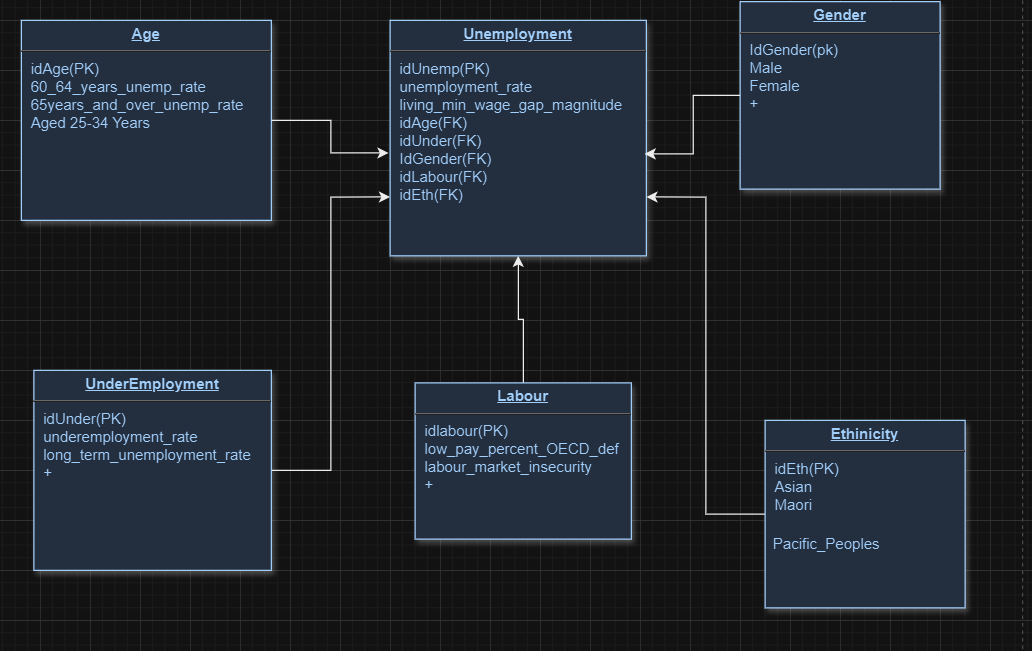

In [74]:
#
Image(filename='schema.png')

### Age

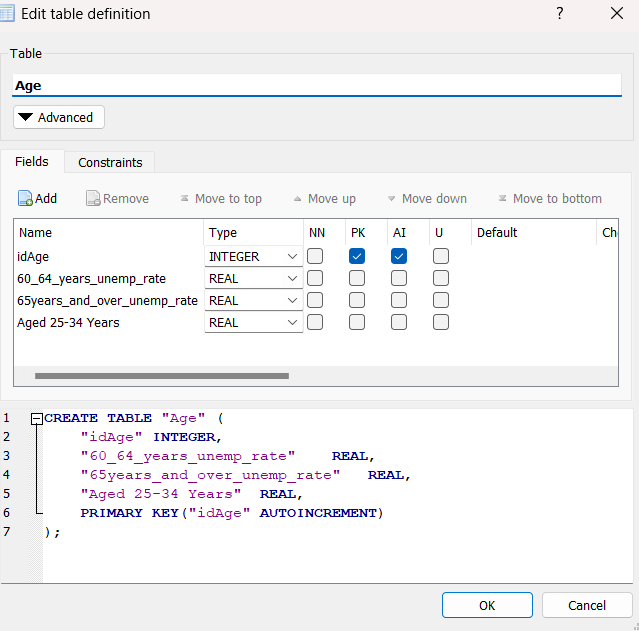

In [190]:
#
Image(filename='age.png')


The table shows that people aged 60-64 have a lower unemployment rate compared to the overall unemployment rate. For example, when the general unemployment rate is 8.4%, it's only 3.1% for those aged 60-64. This suggests that older workers tend to have more stable jobs.

The table also shows that the gap between the living wage and the minimum wage is the same (2.131) across all data points. This means that this wage gap doesn't change based on unemployment rates or the age group.

In summary, older workers (60-64) seem to have more secure employment, but the issue of the living wage being higher than the minimum wage affects everyone equally, regardless of age or unemployment status.

### Ethnicity

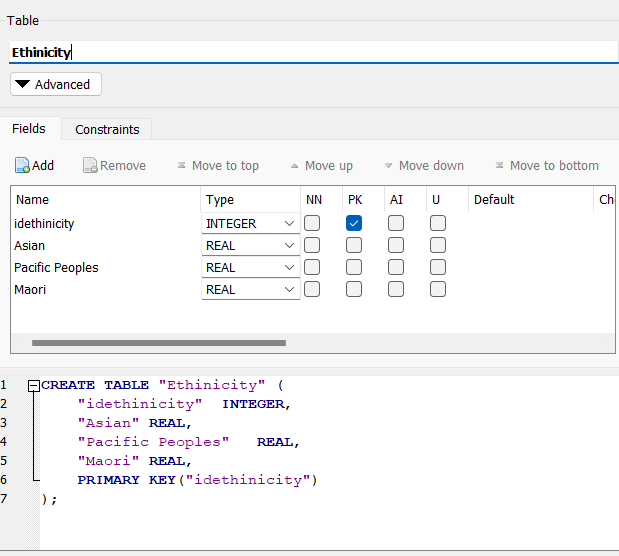

In [193]:
#
Image(filename='ethnicity.png')

### Gender

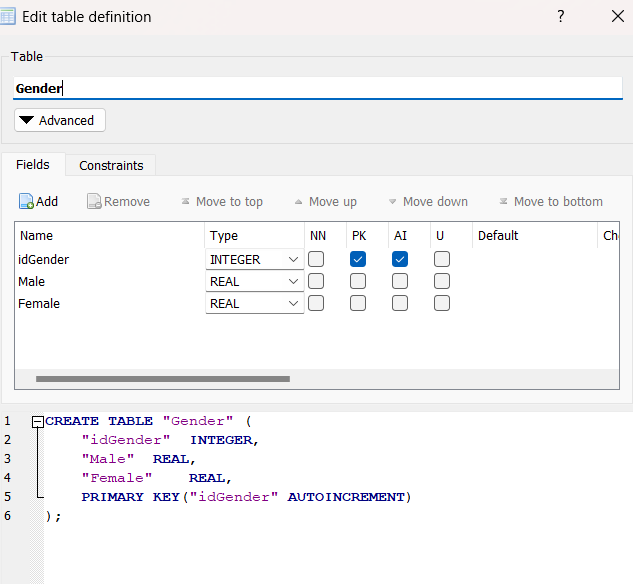

In [194]:
#
Image(filename='gender.png')

### Labour

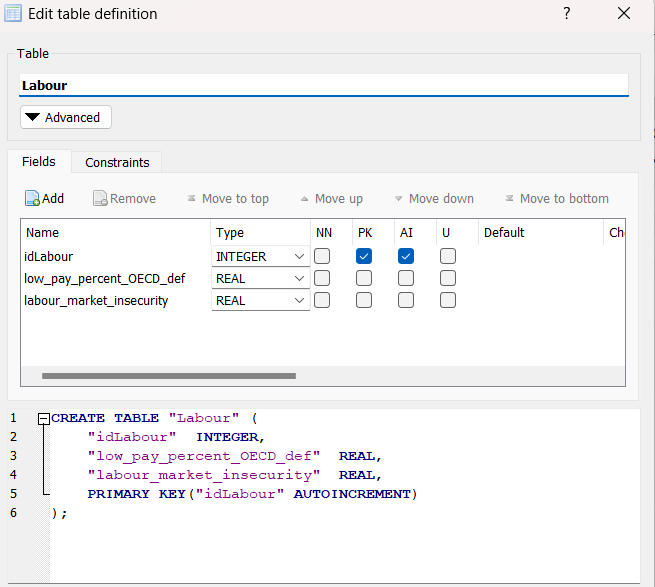

In [195]:
#
Image(filename='labour.png')

### Underemployment

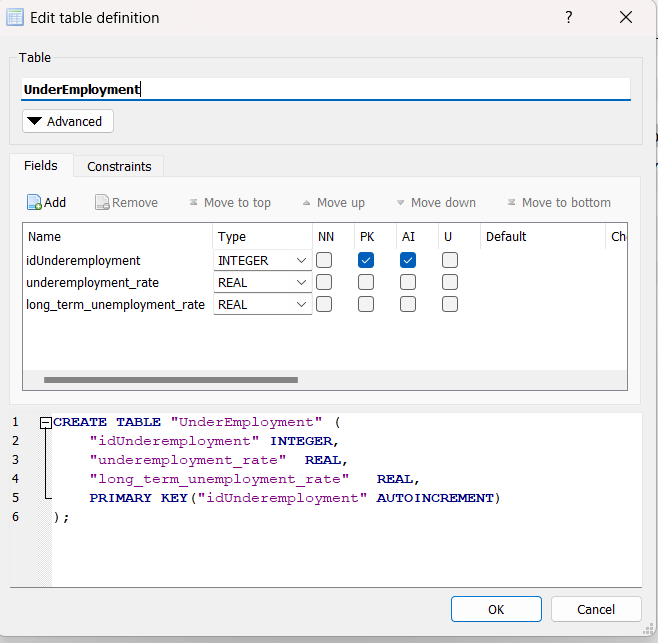

In [196]:
#
Image(filename='underemployment.png')

### Unemployment

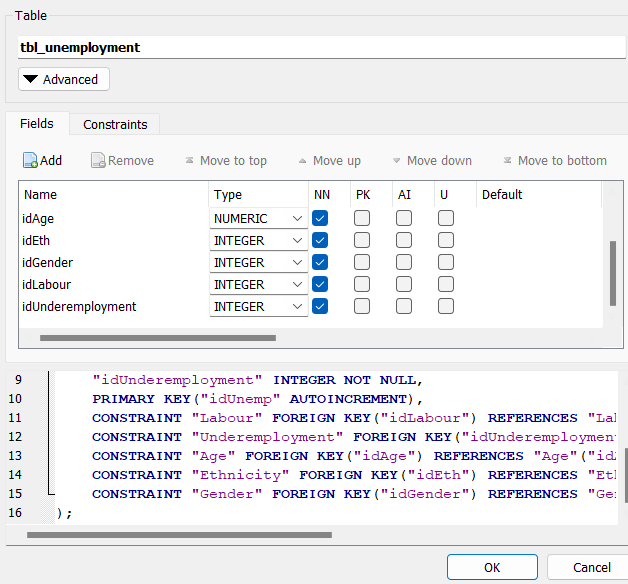

In [13]:
#
Image(filename='unemployment.png')

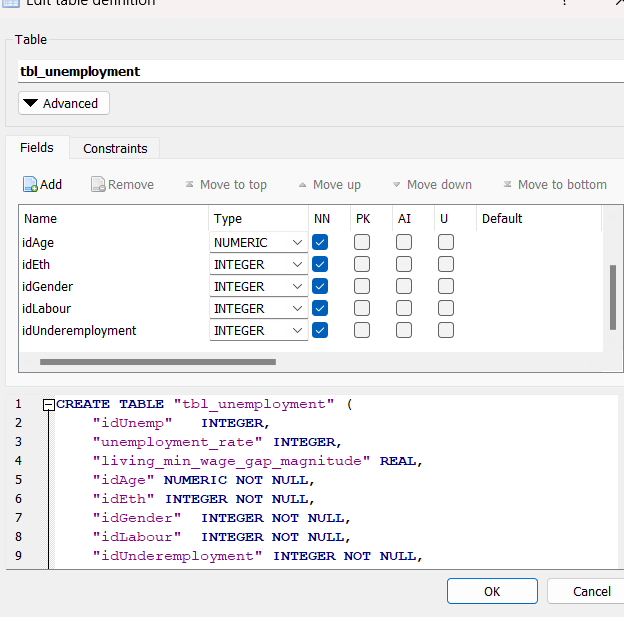

In [17]:
#
Image(filename='unemployment (2).png')

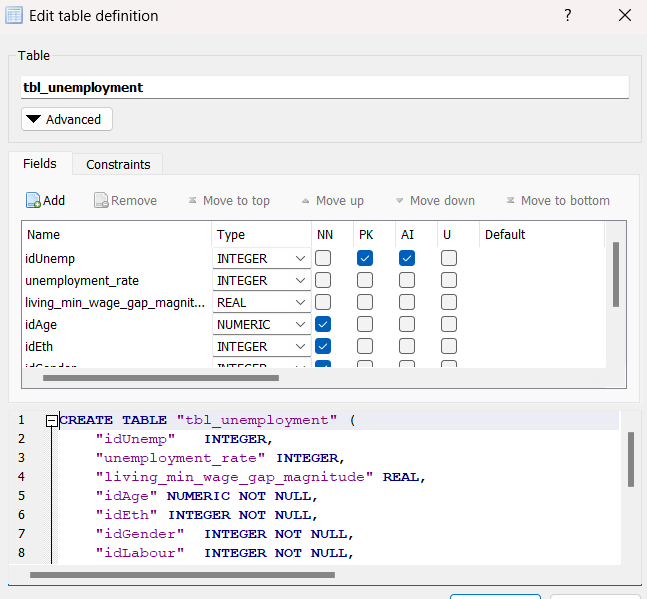

In [18]:
#
Image(filename='unemployment (3).png')

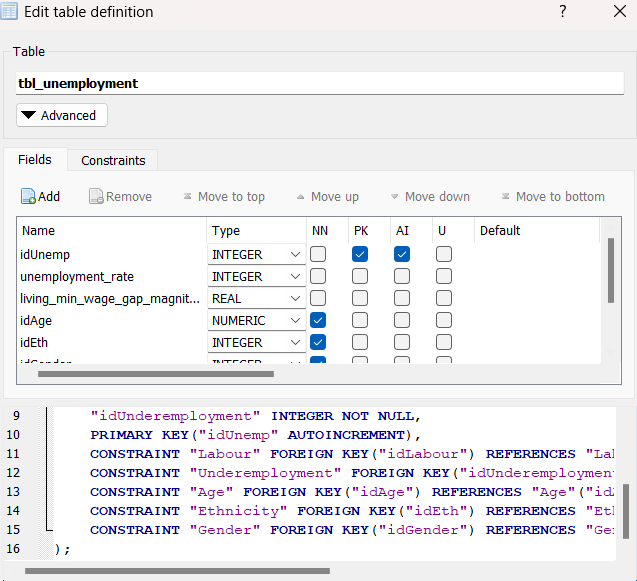

In [19]:
#
Image(filename='unemployment (4).png')

# DATA ANALYSIS


### Column 1 to 5 consider as Year in ascending order from 1980 to 2022 where 1 is consider as 1980, and 5 is consider as 2022


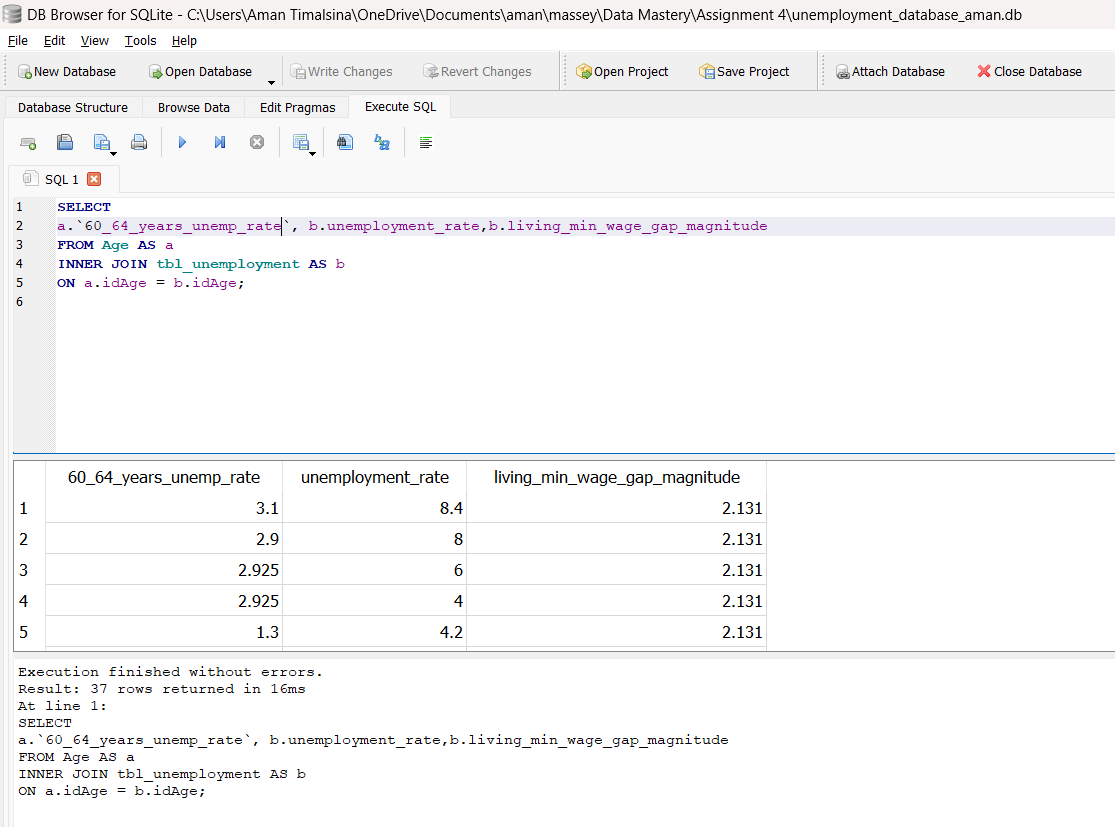

In [77]:
#
Image(filename='60_64_years_unemp_rate.png')

From the above table, the people with age 60_64_years_unemp_rate is deciling over the year from 3.1 to 1.3. The general unemployment rate is 8.4, and 3.1 for 60_64_years_unemp_rate. 
The living wage gap magnitude, which is the difference between the living wage and the minimum wage, is constant at 2.131 in all cases. This means that the wage gap does not change with different unemployment rates or age groups.

In summary, older adults (60 to 64 years) have lower unemployment rates, but the living wage gap remains the same for everyone.

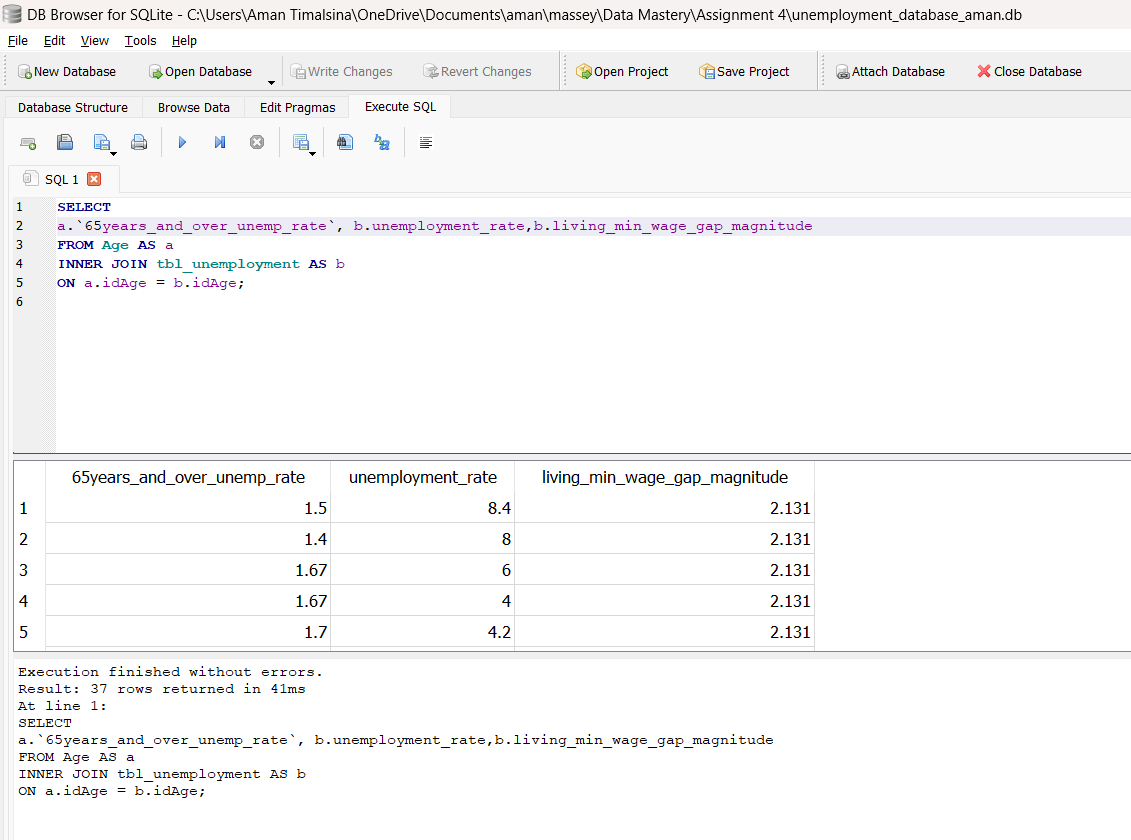

In [78]:
#
Image(filename='65years_and_over_unemp_rate.png')

The table shows that people aged 65 and over have a much lower unemployment rate compared to the general population. For example, when the general unemployment rate is 8.4%, it's only 1.5% for those 65 and over. This suggests older adults have more job stability or are less likely to be unemployed.

The living wage gap magnitude, which is the difference between the living wage and the minimum wage, is constant at 2.131 in all cases. This means that the wage gap does not change with different unemployment rates or age groups.

In summary, older adults (65 and over) have lower unemployment rates, but the living wage gap remains the same for everyone.

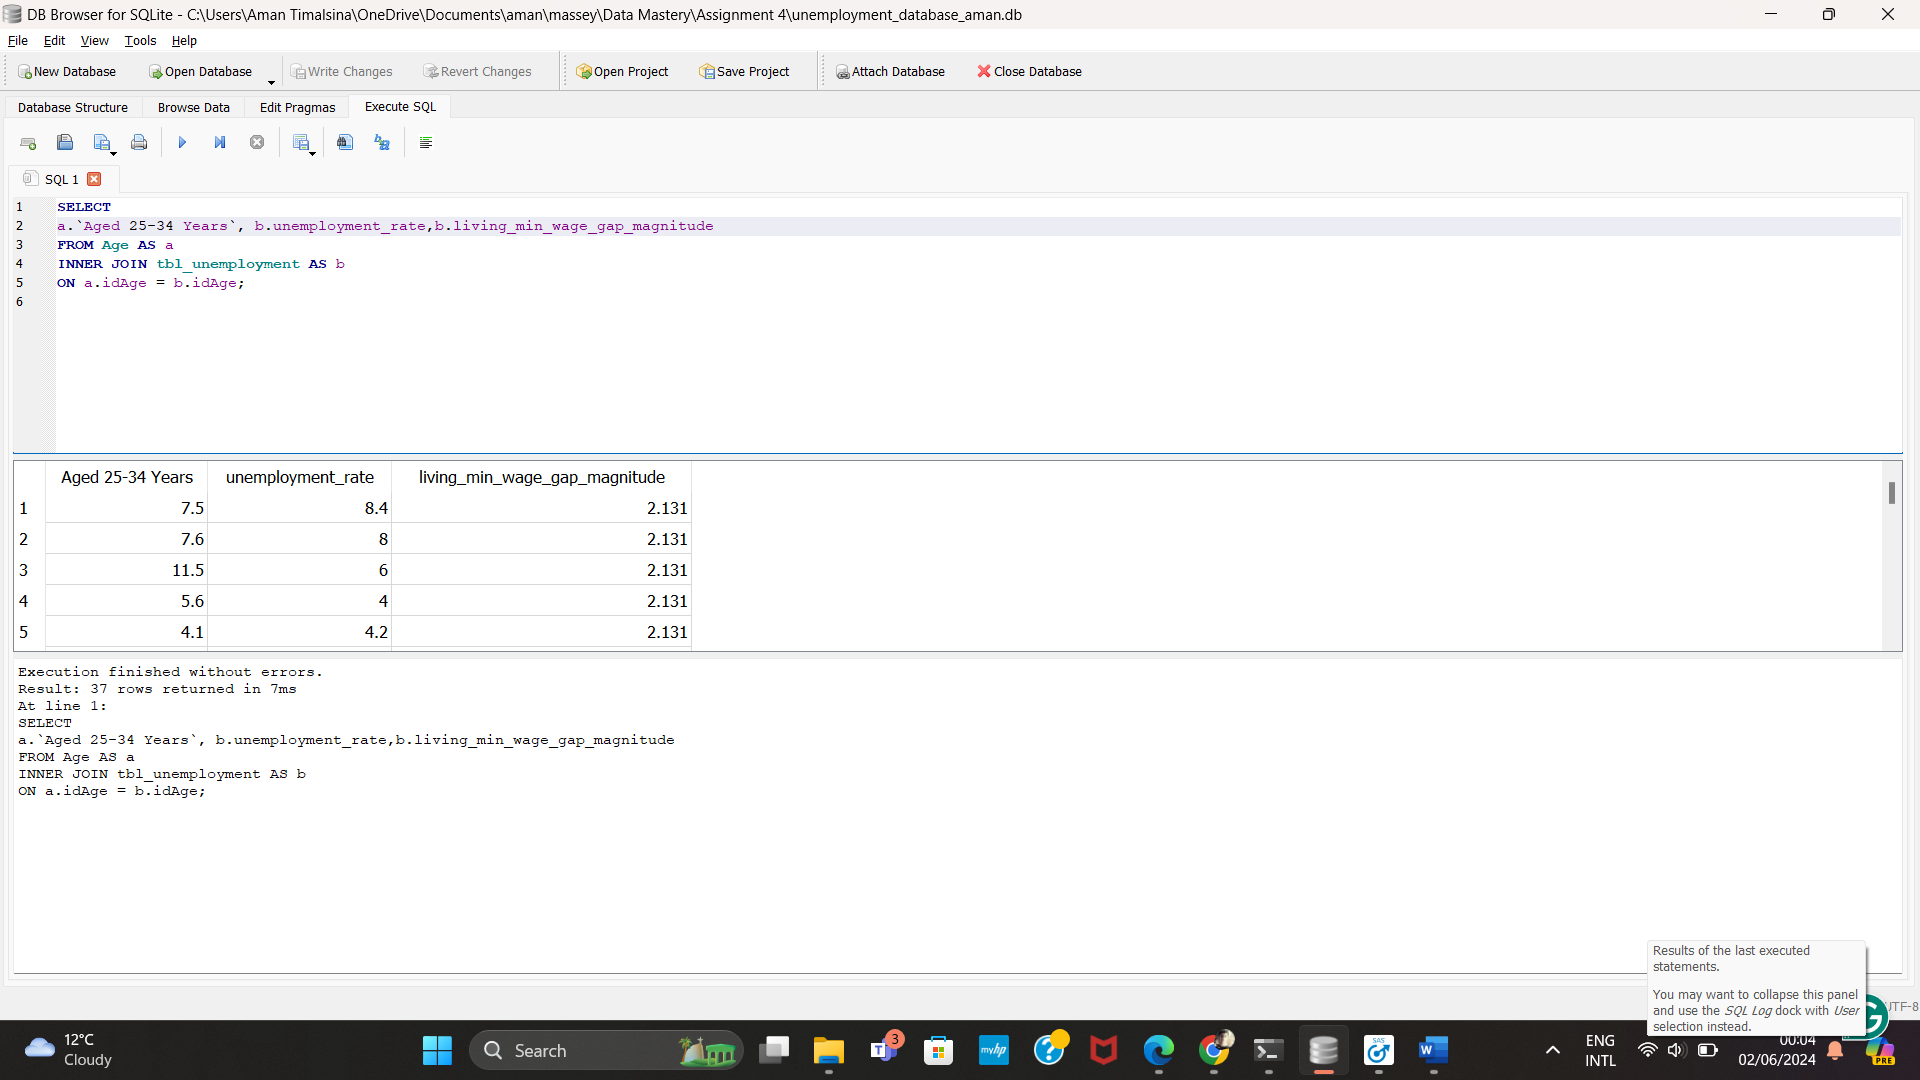

In [79]:
#
Image(filename='Aged 25-34 Years.png')

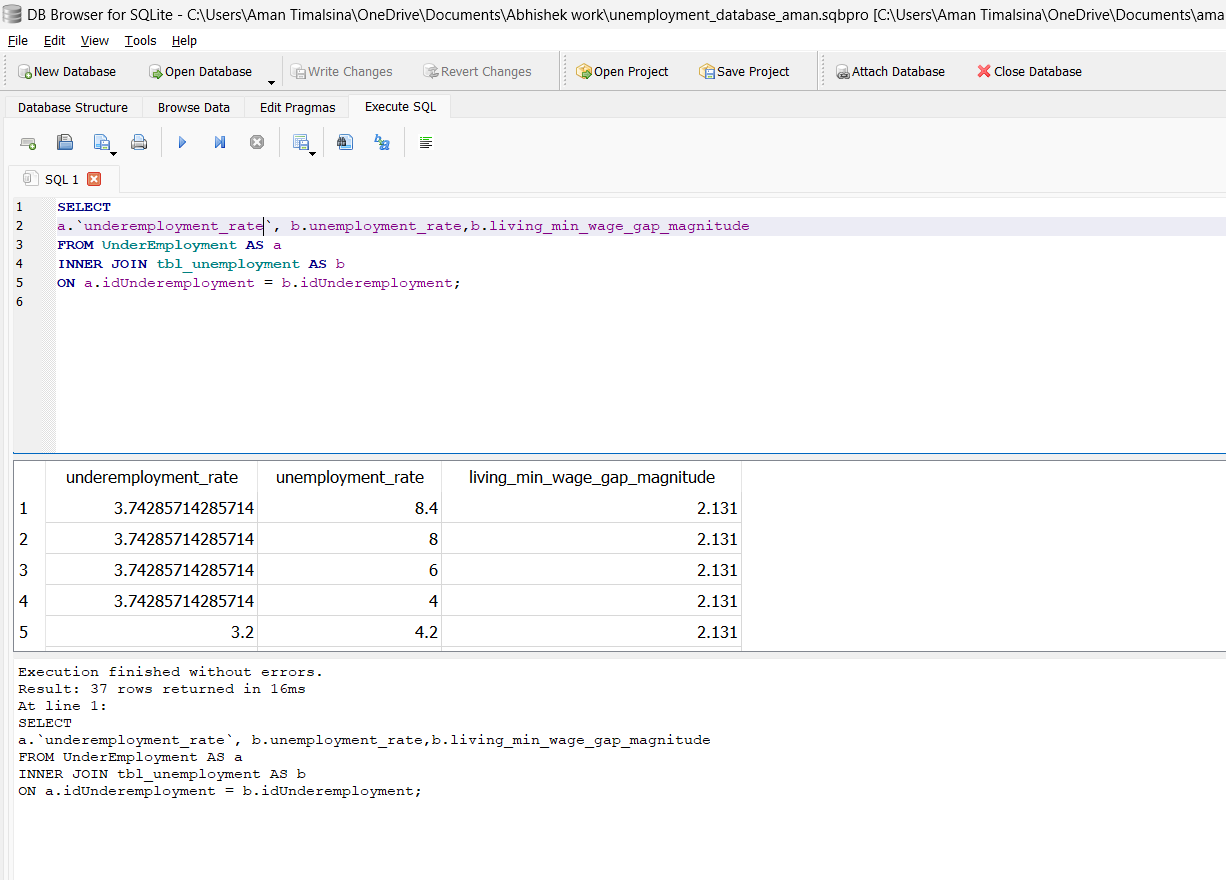

In [81]:
#
Image(filename='underemployment_rate.png')

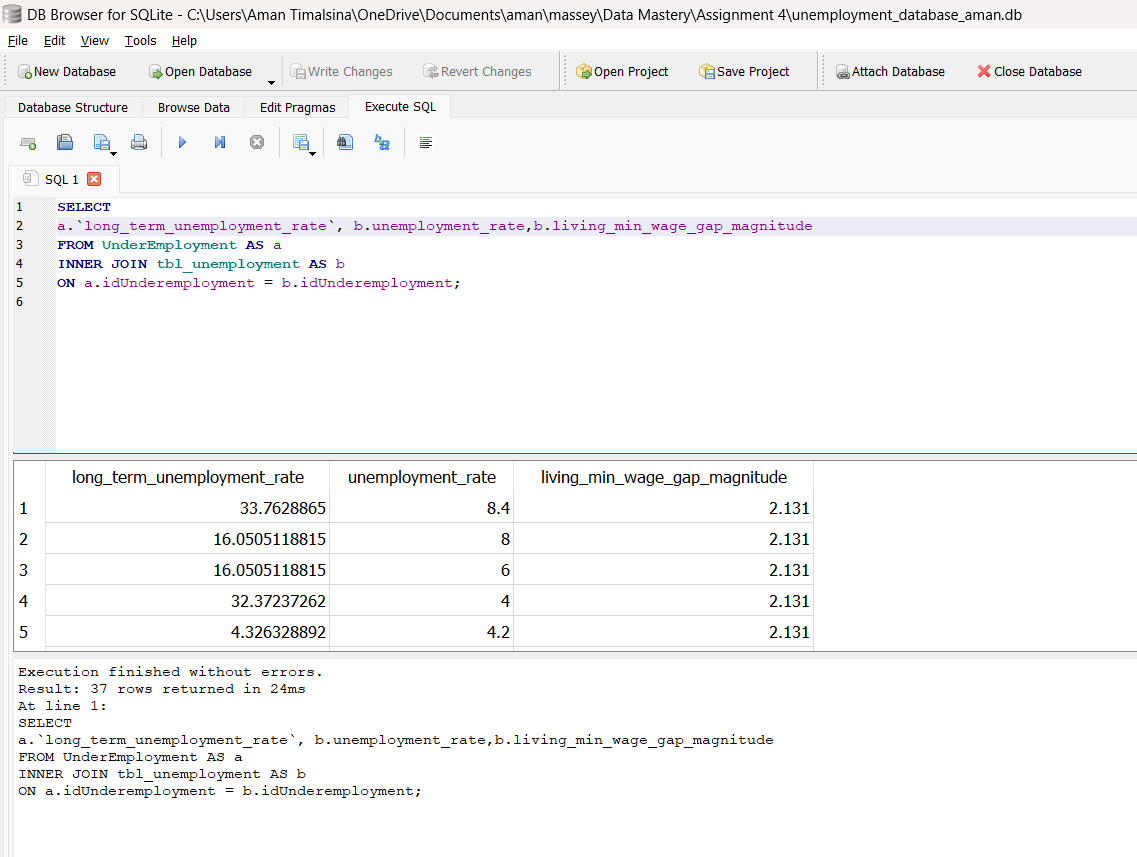

In [82]:
#
Image(filename='long_term_unemployment_rate.png')

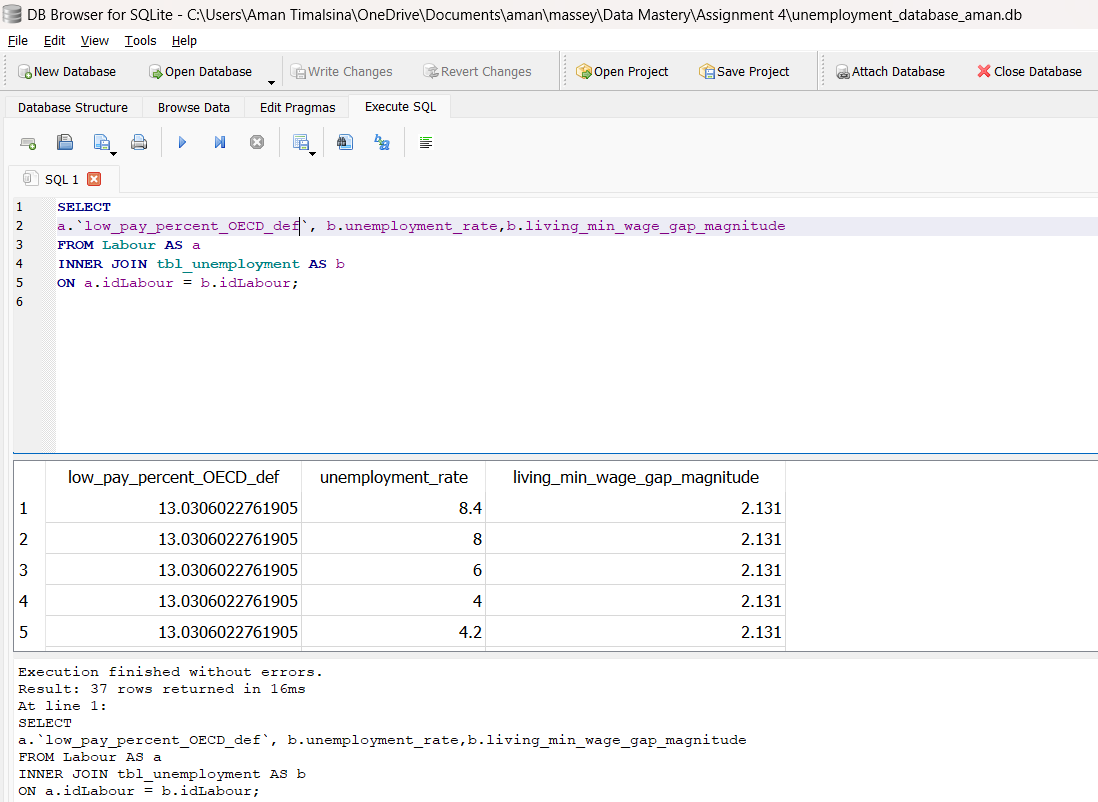

In [83]:
#
Image(filename='low_pay_percent_OECD_def.png')

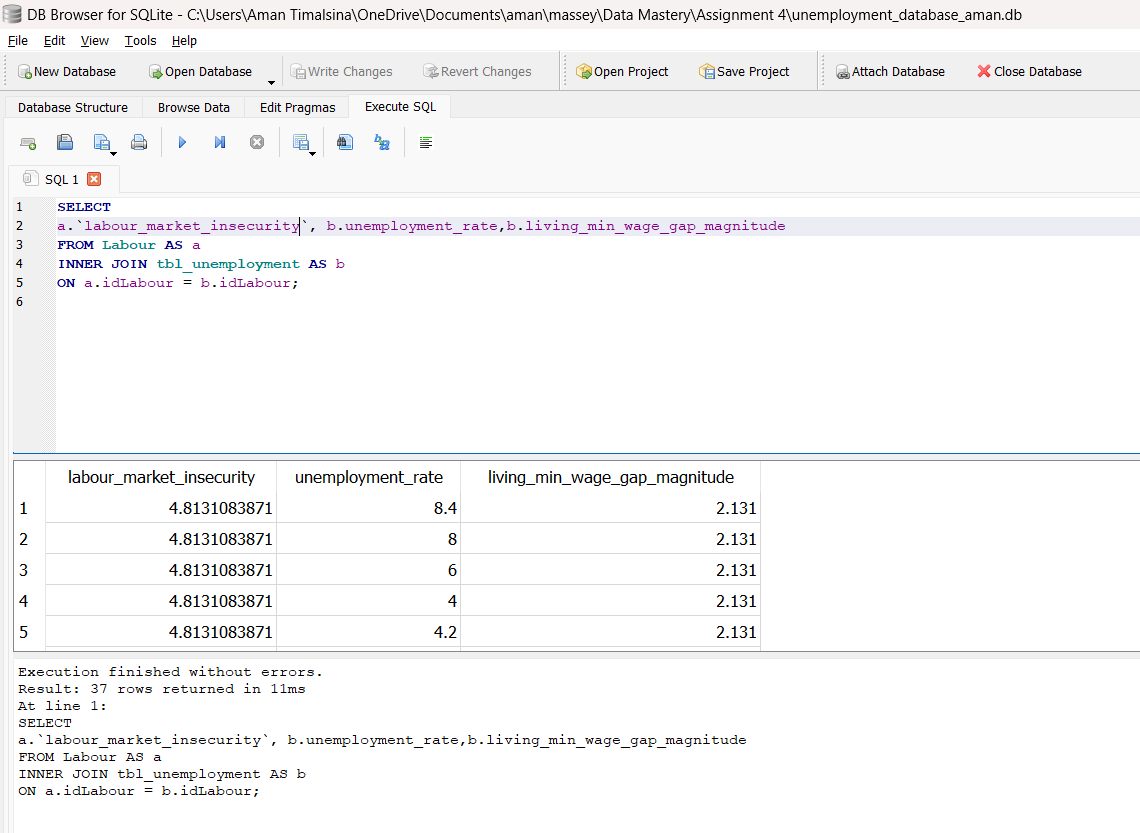

In [84]:
#
Image(filename='labour_market_insecurity.png')

### From below I tried to show the relationship between the whole gender table with the unemployment table.

From the above table, labour market insecurity shows a constant over the year. 

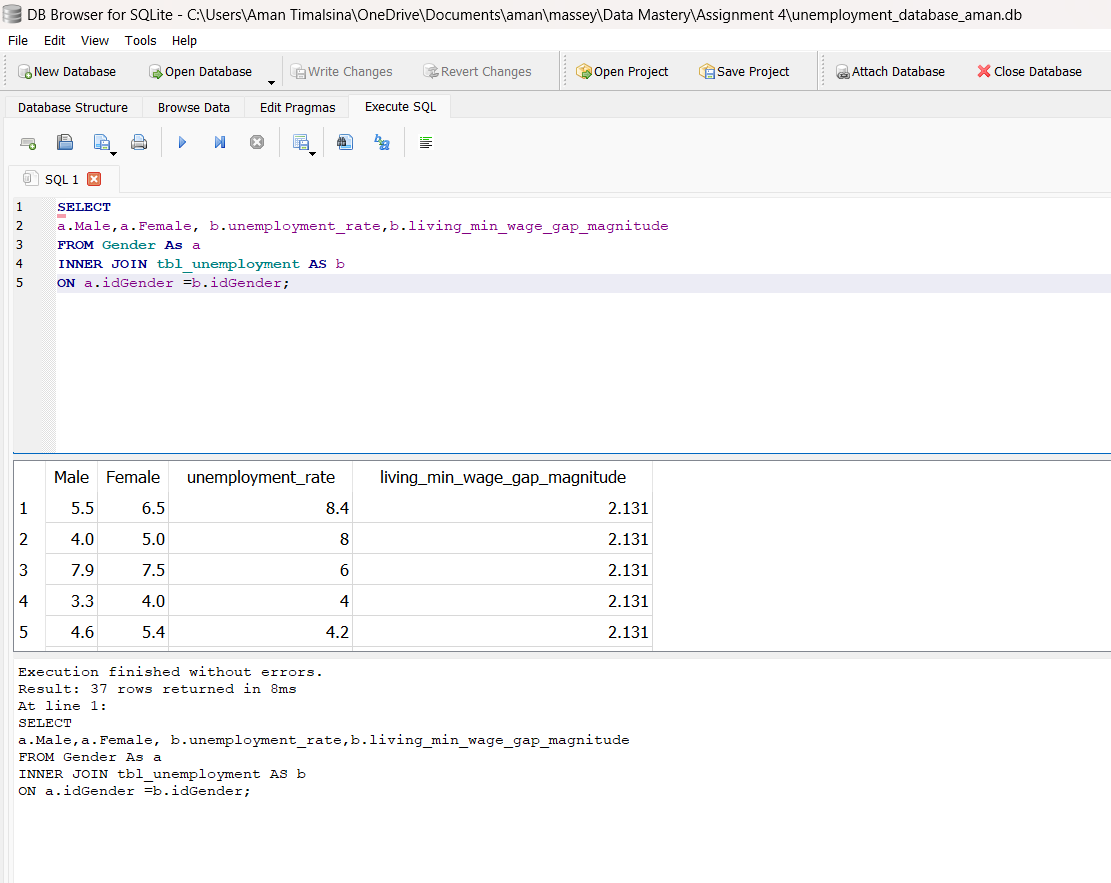

In [65]:
#
Image(filename='Gender.png')

From the above table, The male unemployment rate tends to fall as compared to the Female which is 4.6 for Males and 5.4 for Females. However, the overall unemployment rate rose slightly from 4 to 4.2 for both genders respectively. On the other hand, living min wage gap magnitude is constant over the year.

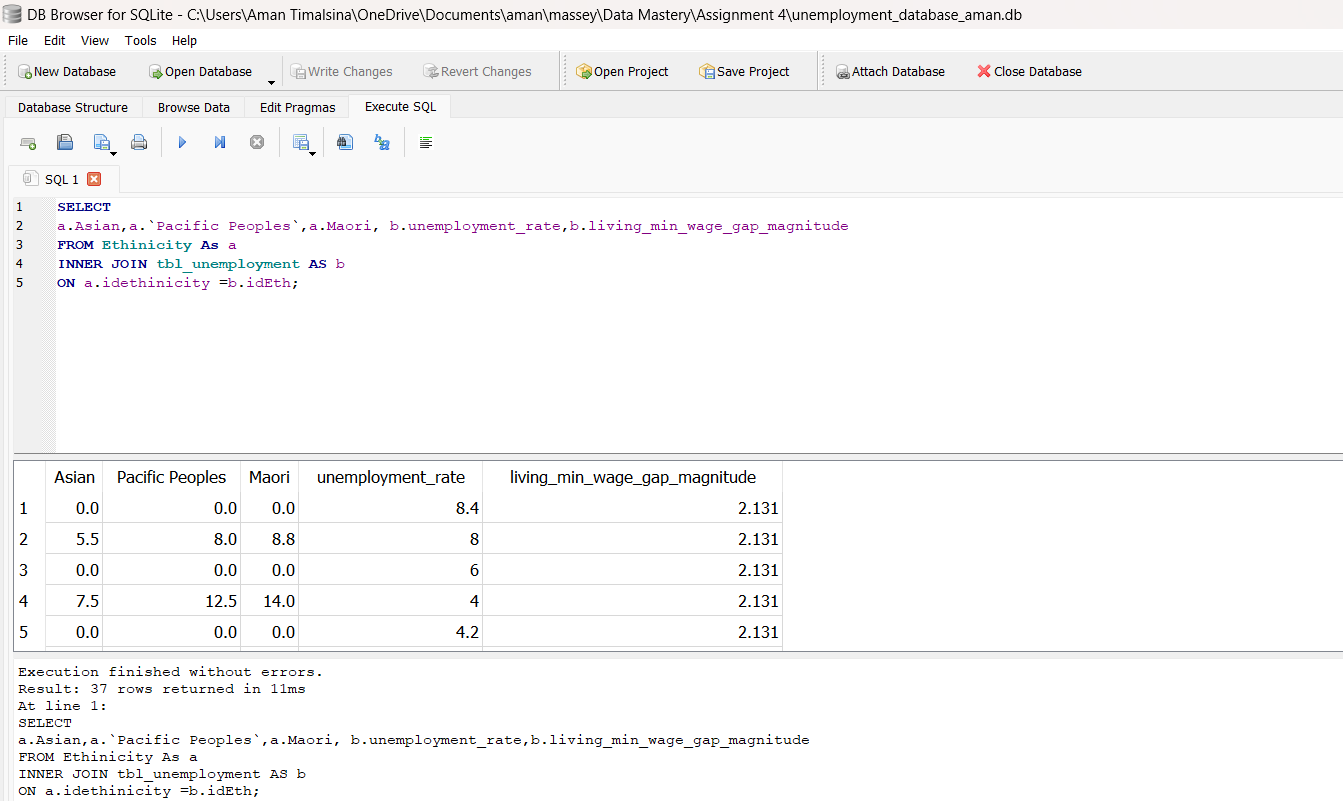

In [64]:
#
Image(filename='Ethnicity.png')

From the above Ethnicity table, In the last year the unemployment rate for the Asian, Pacific Peoples, and Maori tend to decline(4.2) in comparison of past years. However, the living min wage gap magnitude remains the same.
